# ALDS Tutorial 3: Bomen en Games (en randomisation)
*NB: deze tutorial is in het Engels (zoals de reader) - this is gedaan om de terminologie voor Game Trees (en straks Monte-Carlo Tree Search, niet te hoeven vertalen om taalverwarring te voorkomen.*

Welcome to this tutorial on Game Trees, which is the third tutorial for ALDS. This tutorial is a key preparation for the= week 3/4 assignment on Monte-Carlo tree search. It is therefore highly recommended to do this tutorial, before starting the assignment. 

As the name suggests, in this tutorial, we are going to use a Tree datastructure to respresent different possible subsequent moves (from a certain game state onwards) of a game, and their results.

To investigate this, we will use the game of tic-tac-toe (also known as naughts and crosses) (boter-kaas-en-eiren). Tic-tac-toe is a simple 3-in-a-row game, played on a 3 by 3 board. As such, we can respresent a game state by a tuple: 
- who is to move (player 1 or 2), and
- a 3 by 3 array containing representing the fields of the board and their contents: - 0: empty - 1: player 1's stone (e.g., crosses; 'x') - 2: player 2's stone (e.g., naughts: 'o') 


In [1]:
import copy
import random

# A possible game state after three moves (=6 plies)
state = ([[2, 2, 1], [1, 0, 2], [0, 0, 1]], 7)


def prettyPrintTTT(game_state):
    result = "\n"
    for i in range(3):
        result += "           "
        for j in range(3):
            if game_state[0][i][j] == 1:
                result += "x "
            elif game_state[0][i][j] == 2:
                result += "o "
            else:
                result += "- "
        result += "\n"
    result += "\n"
    if game_state[1] % 2 == 0:
        result += "   naughts ('o') to move"
    else:
        result += "   crosses ('x') to move"
    print(result)


prettyPrintTTT(state)  # Now lets have a look at this state



           o o x 
           x - o 
           - - x 

   crosses ('x') to move


Now, if you are a human, who has playes tic-tac-toe before (first of all: samesies, fist-bump! 👊), you will probably see quickly that crosses playing in the bottom-left corner wins. Often, people will be able to do this without playing out all possible different moves in their head. 

Computers on the other hand, typically do play out all possible next moves, and possible subsequent moves, and the moves after that out, store all of this in a tree, and analyse the tree, in order to be able to decide whether there is a winning move that it should play. 

From the above game state, this will look something like this: 

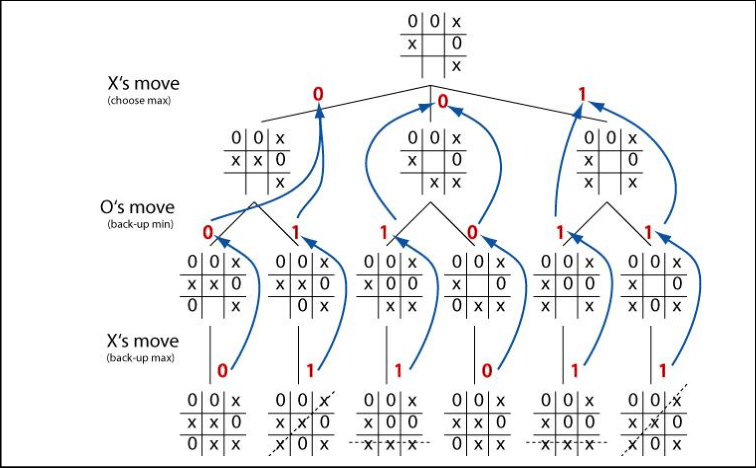

(Image from: https://www.researchgate.net/figure/Game-tree-for-Tic-Tac-Toe-game-using-MiniMax-algorithm_fig1_262672371 ) 

Here, the root node is the current game state. Its child nodes are the game states that are reachable after one ply (i.e., a move by just one of the players - in this case crosses). So, there are three child nodes, each corresponding to a different move for crosses. Those child nodes have child nodes of their own, which again go one ply further. That is, each of the possible moves by naughts ('o') is tried. Those nodes have only one child node each (because there is only one possible move by crosses left). 

Please note that child nodes should only be added from a game state that is not "finished" yet, i.e., neither player has won yet, and there are still moves to play. A game can finish in three ways: player 1 wins, player 2 wins, or there is a draw (when the board is full, and neither player has won). 

So, let's build a tree, starting with the root node. In the following code, we first define a function to check whether the game is finished, and if so, who won. Secondly we define the basic data structure for the Game Tree, i.e., a game tree node. 

NB: Please note that the implementation we use here does not follow a tidy object-oriented approach; this is because of the notebook structure of the code, where we define things incrementally, so that we can intertwine explanation and code. 

In [2]:
# This function returns the tuple (finished, winningColor)
def checkFinishedAndWhoWon(game_state):
    open_fields = False
    board = game_state[0]
    # check lines
    for i in [0, 1, 2]:
        color = board[i][0]
        line = True
        for j in [0, 1, 2]:
            if board[i][j] == 0:
                open_fields = True
                line = False
                break

            if board[i][j] != color:
                line = False
                # don't break here yet, to allow detection of open fields.
        if line:
            return (True, color)

    # check columns
    line = False
    for i in [0, 1, 2]:
        color = board[0][i]
        if color == 0:
            continue
        line = True
        for j in [0, 1, 2]:
            if board[j][i] != color:
                line = False
                break
        if line:
            return (True, color)

    # check diagonals
    color = board[1][1]  # the middle
    if color == 0:
        return (False, 0)
    if (board[0][0] == color) and (board[2][2] == color):
        return (True, color)
    if (board[2][0] == color) and (board[0][2] == color):
        return (True, color)
    return (not open_fields, 0)


class GameTreeNode:
    def __init__(self, gstate, parentNode=None, last_move=None):
        self.state = gstate
        self.finished, self.won = checkFinishedAndWhoWon(self.state)
        self.parent = parentNode
        self.children = []
        self.last_move = last_move

    def printNode(self):
        # print("Node:\n")
        print("  has_parent: " + str(self.parent != None))
        print("  no. of children: " + str(len(self.children)))
        print(
            "  result: "
            + (
                ("player " + str(self.won) + " won" if self.won != 0 else "draw")
                if self.finished
                else "not yet finished"
            )
        )
        print("  game state:")
        prettyPrintTTT(self.state)


root = GameTreeNode(state)
root.printNode()


  has_parent: False
  no. of children: 0
  result: not yet finished
  game state:

           o o x 
           x - o 
           - - x 

   crosses ('x') to move


So, now we have a root node, with an object-variable $children$. To this object variable - a list - we can add the children. In order to do so, we of course need to be able to A) identify the valid moves, and B) write a function to "play' a valid move, and obtain a new game-state, C) a function to add all the subsequent game-states as a nodes in the tree

I am going to do B and C, please do A:

## Assignment 1
Write a function that identifies the valid moves in a given game-state. 

In [3]:
###Uw antwoord hier:


In [4]:
###B: getting a new game state
def play(
    game_state, move
):  ##move is a tuple indicating where the player to move is going to place a stone
    if game_state[1] % 2 == 1:
        new_stone = 1  # black
    else:
        new_stone = 2  # white
    new_game_state = (copy.deepcopy(game_state[0]), game_state[1] + 1)
    if new_game_state[0][move[0]][move[1]] == 0:
        new_game_state[0][move[0]][move[1]] = new_stone
    else:
        return None  # invalid move
    return new_game_state


###C: adding new nodes to the tree
def expandAllByOnePly(game_tree_node, valid_moves):
    if game_tree_node.finished:
        return False  ##Nothing to do here, the game is finished
    for move in valid_moves:
        new_state = play(game_tree_node.state, move)
        game_tree_node.children.append(
            GameTreeNode(new_state, parentNode=game_tree_node, last_move=move)
        )
    return True


In [5]:
# Now let us define a function that "pretty" prints a tree (starting from a root node)
def tree2String(game_tree_node, prefix=""):
    result = ""
    if game_tree_node != None:
        result += (
            prefix + str(int(len(prefix) / 2)) + ": " + str(game_tree_node.state) + "\n"
        )
        result += prefix + "{\n"
        cprefix = prefix + "  "
        for child in game_tree_node.children:
            result += tree2String(child, cprefix)
        result += prefix + "}\n"
    return result


# reinitialising the root node (because that's easier than re-evaluating the previous cells)
root = GameTreeNode(state)

# I'm cheating here, please replace this by your own function from Assignment 1:
valid_moves = [(2, 0), (2, 1), (1, 1)]

expandAllByOnePly(root, valid_moves)
print(tree2String(root))


0: ([[2, 2, 1], [1, 0, 2], [0, 0, 1]], 7)
{
  1: ([[2, 2, 1], [1, 0, 2], [1, 0, 1]], 8)
  {
  }
  1: ([[2, 2, 1], [1, 0, 2], [0, 1, 1]], 8)
  {
  }
  1: ([[2, 2, 1], [1, 1, 2], [0, 0, 1]], 8)
  {
  }
}



As you can see in the above example the root node now has three children (the children are indented further and are between '{' and '}'). However, these children should again get children of their own. 

## Assignment 2
Please write a function, based on the $expandAllByOnePly$ function, that recursively expands the game tree (i.e., keeps on adding child nodes) until the game is finished. This should give you the game tree corresponding to the image below: 

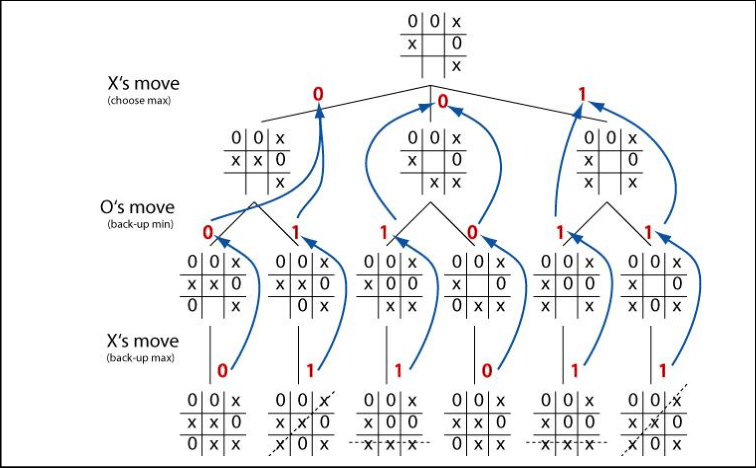

In [6]:
## Uw antwoord hier:


The one thing left to do now, is to determine the best move. This is also represented in the image above. I.e., from the root node, we want to do the best move. This best move is the move that gives us the best result: i.e., whether we win. However, we cannot see whether we will win directly from the next game-state (we do not win immediately). However, if we do our best move, then the opponent does their best move, and then we do our best move again, we are able to win. This is thus a recursive definition of winning. Let us define the value of a game state as:
- +1 we win
- -1 we lose
- 0 draw

This is known for the game states where the game is finished: the leaf nodes of the tree. However, when the game is not finished, we need to look at the subsequent game states. The current game state is the root of our tree. The subsequent game states are its children. Therefore, we can determine whether we win using a recursive function on the tree, according to the following pseudo-code (in the comments):

In [7]:
# function value(node):
#  if(node.state.finished)
#     return +1 if we win, -1 if we lose, 0 if its a draw
#  else
#     value = -2 if it's our turn, else (if it's the opponent's turn): 2
#     for all ch in children
#        value = max {value(ch), value} if it's our turn, else (if it's the opponent's turn): min {value(ch), value}
#     return value


Of course, we would prefer to store the values in the tree, such that we can extract not only the value, but also the right move to play. 

## Assignment 3
Please redefine the Game Tree class to compute the values of each node in the tree (e.g., via a new function, or the expand function, or... well there's a lot of ways to do this). 

In [8]:
### Uw antwoord hier:
class GameTreeNode2:
    def __init__(self, gstate, parentNode=None, last_move=None):
        self.state = gstate
        self.finished, self.won = checkFinishedAndWhoWon(self.state)
        self.parent = parentNode
        self.children = []
        self.last_move = last_move
        self.value = None

    ### please implement some way to compute the values for each node in the tree
    ### such that this next function gives us the right answer
    ### it is assumed that the AI moves with color 1 (black)
    def best_move(self):
        self.calcValue()
        best_value = self.value
        for ch in self.children:
            if ch.value is best_value:
                return ch.last_move
        return None  ##if this node does not have children


In [9]:
### Please write test code here to show that the above implementation is correct


The above game tree only has 6 nodes when recursively expanded until the games end. And even if we would build the game tree from the starting position of tic-tac-toe (and empty 3 x 3 board), it would be possible to recursively fully expand the entire game tree. This is because tic-tac-toe has (much) less than 9! ($size < 362880$) possible games (9 possible first moves, 8 possible next moves, etc.; but less than that because many of those games finish before the board is full). 

In some games however, it will be impossible to generate the entire game tree and keep it in memory. In that case, we can use randomness to determine the values of nodes. A naive idea to do this is to expand the root node fully (that is, add all valid moves as its children), and then determine the value of its children by doing a lot of random roll-outs (making moves randomly until the end). 

In each node, we will now keep a statistic Q: the sum of the scores we get after roll-outs from the corresponding game-state; and a statistic N: the number of roll-outs performed from this game-state onward. This will give us a new value estimate for the game state (corresponding to the node), i.e., Q/N. 

Please have a look at the following code:

In [10]:
class GameTreeNode3:
    def __init__(self, gstate, parentNode=None, last_move=None, valid_move_list=None):
        self.state = gstate
        self.finished, self.won = checkFinishedAndWhoWon(self.state)
        self.parent = parentNode
        self.children = []
        self.last_move = last_move
        self.Q = 0  # number of wins
        self.N = 0  # number of visits
        self.valid_moves = valid_move_list

    def fully_expanded(self):
        return len(self.children) is len(self.valid_moves)

    def expand(self, move, n_rollouts):
        # when expanding a node with a new child node, we are not also going to perform a number of roll-outs.
        # first, we create the new node:
        new_state = play(self.state, move)
        if new_state is None:
            return
        new_valid_moves = copy.deepcopy(self.valid_moves)
        new_valid_moves.remove(move)
        new_node = GameTreeNode3(
            new_state, parentNode=self, last_move=move, valid_move_list=new_valid_moves
        )
        # add it to the children:
        self.children.append(new_node)
        # and then perform a number of random roll-outs: random plays until the game finishes
        for i in range(n_rollouts):
            score = new_node.roll_out()
            # and process the result (score) we get from this rollout
            new_node.process_result(score)

    def roll_out(self):
        # rollouts are quite simple
        # when the node respresents a game state of a game that's finished, we immediately return the result
        if self.finished:
            if self.won == 1:
                return 1
            elif self.won == 2:
                return -1
            else:
                return 0
        # else we play moves in on the remaining open fields
        moves = copy.deepcopy(self.valid_moves)
        random.shuffle(moves)
        new_state = self.state
        for move in moves:
            new_state = play(new_state, move)
            fin, whowon = checkFinishedAndWhoWon(new_state)
            # until the game finishes, and return the score:
            if fin:
                if whowon == 1:
                    return 1
                elif whowon == 2:
                    return -1
                else:
                    return 0

    def process_result(self, rollout_result):
        # then we increase Q by the score, and N by 1
        self.Q += rollout_result
        self.N += 1
        # and do the same, recursively, for its ancestors
        if self.parent is not None:
            self.parent.process_result(rollout_result)


def tree2StringWithValues(game_tree_node3, prefix=""):
    result = ""
    if game_tree_node3 is not None:
        result += (
            prefix
            + str(int(len(prefix) / 2))
            + ": "
            + str(game_tree_node3.state)
            + "\n"
        )
        result += prefix + "value: " + str(game_tree_node3.Q / game_tree_node3.N) + "\n"
        result += prefix + "{\n"
        cprefix = prefix + "  "
        for child in game_tree_node3.children:
            result += tree2StringWithValues(child, cprefix)
        result += prefix + "}\n"
    return result


# when we do this, with a 100 roll-outs for each child node, we get value estimates (not exact values, just estimates)
# for each child node:
root = GameTreeNode3(state, valid_move_list=[(1, 1), (2, 0), (2, 1)])
for mv in root.valid_moves:
    root.expand(mv, 100)
print(tree2StringWithValues(root))


0: ([[2, 2, 1], [1, 0, 2], [0, 0, 1]], 7)
value: 0.6866666666666666
{
  1: ([[2, 2, 1], [1, 1, 2], [0, 0, 1]], 8)
  value: 0.49
  {
  }
  1: ([[2, 2, 1], [1, 0, 2], [1, 0, 1]], 8)
  value: 1.0
  {
  }
  1: ([[2, 2, 1], [1, 0, 2], [0, 1, 1]], 8)
  value: 0.57
  {
  }
}



Node that one move (corresponding to the second child in the list here) always wins, and gets a value estimate of 1. The nodes that do not necessarily win though get a value estimate of about 0.5. This is because random roll-outs are inexact; rather than playing the best move for the opponent (which would lead to a draw), it will do a random move. Using this random move, we will still win about half of the time. While this is obviously not the right value, it will however still enable us to select the best child node and corresponding move (the one that always wins). Furthermore, the root node will also predict a win for us when rounded to whole numbers. So even though the value estimates are not accurate, it still enables us to play relatively well. 

## Assignment 4
Please write a function that selects the best move from a given node onwards on the basis of the values (Q/N) of the child nodes. 

In [11]:
### Uw antwoord hier:


So, now we have seen two methods for selecting the best/a good next move: one is based on expanding the entire game tree until the game finishes. However, these isn't always time to do so. The second method, is computationally more efficient, as it relies on random roll-outs, i.e., it is a Monte-Carlo method. 

The second method establishes (shaky) value estimates by creating child nodes for every move from the root node, and then doing X random roll-outs for each of these child nodes. We have seen that these value estimates can be rather far off though. So if we have not enough time to expand the entire game tree, but still quite a lot of time, we could mix these two ideas: 
- we expand nodes until they are fully expanded and do random roll-outs for their children (as in the second algorithm)
- but, if time allows, we do the same for the most promising child as well
- and if we're very lucky, we might even hit finished game states by doing so if there /is/ enough time after all.

This idea is the basic scheme behind Monte-Carlo tree search (MCTS). MCTS is the theme of the large (graded) assignment for week 3/4 of the course. Please turn to your reader for the definition of MCTS, and Canvas for the exact assignment. 

In [12]:
# SUCCES ALLEMAAL!
